<div style="text-align: center;">
<h2>Ayudantía 4</h2>
</div>
<p>En esta ayudantía, nos enfocaremos en el uso de APIs y técnicas de web scraping para la extracción de datos.
Pueden ver el material complementario abriendo el archivo  <code> ayudantia4.html</code> . Consideren que deben tener el repositorio del curso actualizado para que se visualizen bien las imgs. </p>

En esta ocasion ocuparemos BeautifulSoup para realizar el web scraping de las páginas que nos interesan.
Particularmente https://books.toscrape.com/

In [57]:
# importamos las librerias necesarias
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [58]:
url = "https://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser') 


In [59]:
#veamos el resultado
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

In [60]:
# buscamos tener la informacion de los libros que se muestran en la pagina , 
# para eso vamos a buscar los elementos que nos interesan en el HTML

book_elements = soup.find_all('article', class_='product_pod')


In [61]:
book_elements # devuelve una lista de elementos 'article' con la clase 'product_pod'

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

In [62]:
# podemos extraer de cada libro la informacion que nos interesa para generar un DF 
books = []
for book in book_elements:
    titulo = book.h3.a['href'].replace('catalogue/','').replace('index.html','').replace('-',' ').title()
    index_ = titulo.find("_")
    titulo = titulo[:index_] if index_ != -1 else titulo
    precio = book.find('p', class_='price_color').text.strip()[2:]  
    stock = book.find('p', class_='instock availability').text.strip()
    rating = book.p['class'][1].split(" ")[-1] # La clase contiene el rating en formato de texto
    rating_c = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
    books.append({'titulo': titulo, 'precio': float(precio), 'stock': 'yes' if 'In stock' in stock else 'no', 'rating': rating_c.get(rating, 0)})




In [63]:
# ahora lo pasamos a DF 
df = pd.DataFrame(books)
df.head()

,titulo,precio,stock,rating
0,A Light In The Attic,51.77,yes,3
1,Tipping The Velvet,53.74,yes,1
2,Soumission,50.10,yes,1
3,Sharp Objects,47.82,yes,4
4,Sapiens A Brief History Of Humankind,54.23,yes,5


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   titulo  20 non-null     object 
 1   precio  20 non-null     float64
 2   stock   20 non-null     object 
 3   rating  20 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes


## Facilito, terminamos 😎 

... mas o menos ... 
En realidad la página tiene 1000 libros, solo obtuvimos 20. Y ... ¿cómo lo hacemos para scrapear los otros 1980 libros? 
Bueno, si se fijan, esta url : https://books.toscrape.com/catalogue/page-1.html , nos lleva directo a la página de inicio, pero si cambiamos el número de página en la URL, podemos acceder a las otras páginas. 
Podemos iterar y repetir el proceso que hicimos para la primera, veamos como nos va ! 


In [65]:




new_books = []
for i in range(1, 51):
    url = f"https://books.toscrape.com/catalogue/page-{i}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    book_elements = soup.find_all('article', class_='product_pod')
    for book in book_elements:
        titulo = book.h3.a['title']
        # index_ = titulo.find("_")
        # titulo = titulo[:index_] if index_ != -1 else titulo
        precio = book.find('p', class_='price_color').text.strip()[2:]  
        stock = book.find('p', class_='instock availability').text.strip()
        rating = book.p['class'][1].split(" ")[-1]
        rating_c = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
        new_books.append({'titulo': titulo, 'precio': float(precio), 'stock': 'yes' if 'In stock' in stock else 'no', 'rating': rating_c.get(rating, 0)})



Como estamos scrapiando varias paginas (haciendo varias request) nos demoramos un poco más, en mi caso 28 segundos.

In [66]:
df_2 = pd.DataFrame(new_books)

In [67]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   titulo  1000 non-null   object 
 1   precio  1000 non-null   float64
 2   stock   1000 non-null   object 
 3   rating  1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


### Bien! obtuvimos los 1000 libros

In [68]:
df_2.head()

,titulo,precio,stock,rating
0,A Light in the Attic,51.77,yes,3
1,Tipping the Velvet,53.74,yes,1
2,Soumission,50.10,yes,1
3,Sharp Objects,47.82,yes,4
4,Sapiens: A Brief History of Humankind,54.23,yes,5


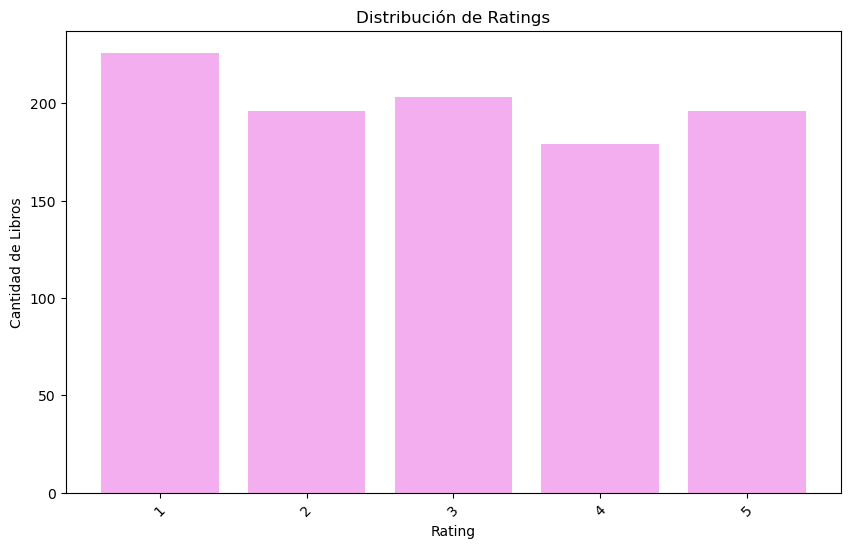

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_2['rating'].value_counts().index, df_2['rating'].value_counts().values, color="#f3aef0")
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad de Libros')
plt.xticks(rotation=45)
plt.show()

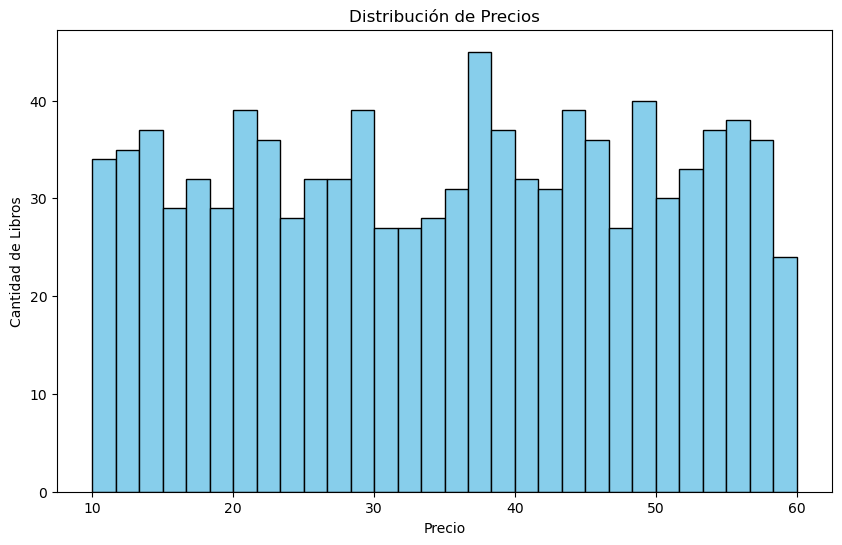

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(df_2['precio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Cantidad de Libros')
plt.show()

## Para practicar : 

1. Ocupando el mismo sitio, aprovechando que cada libro tiene una categoria, hacer un proceso similar, pero que en este caso nos permita tener un valor más en el Dataframe (Categoría)
2. Plotear la distribuición de categorías de libros. 

*hint* : pueden primero scrapear todas las categorias que hay en la pagina. Luego ir a cada una , eg: https://books.toscrape.com/catalogue/category/books/fiction_10/index.html  , observar que la categoria viene junto con un número. Observar también que algunas categorias tienen más de una página. 

In [71]:
# encontrar ul nav nav ñist 

elementos = soup.find_all("ul", class_="nav nav-list") 
type(elementos)

bs4.element.ResultSet

In [72]:
elementos[0]

<ul class="nav nav-list">
<li>
<a href="category/books_1/index.html">
                            
                                Books
                            
                        </a>
<ul>
<li>
<a href="category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="category/books/sequential-art_5/index.html">
                            
                                Sequential Art
                            
                        </a>
</li>
<li>
<a href="category/boo

In [73]:
categorias = [el for el in elementos[0].find_all("a")]
categorias 

[<a href="category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
                             
                         </a>,
 <a href="category/books/classics_6/index.html">
                           

##### ¿qué tenemos hasta ahora? 

- Hemos encontrado el elemento `ul` con la clase `nav nav-list`.
- Hemos extraído las categorías de ese elemento.(que se encuentran dentro de las etiquetas `<a>`)
- De ahi podemos sacar tanto el link, como el nombre 



In [74]:
# crearemos un diccionario para almacenar las categorías
categorias_dict = {e.text.strip() : e['href'] for e in categorias}
categorias_dict

{'Books': 'category/books_1/index.html',
 'Travel': 'category/books/travel_2/index.html',
 'Mystery': 'category/books/mystery_3/index.html',
 'Historical Fiction': 'category/books/historical-fiction_4/index.html',
 'Sequential Art': 'category/books/sequential-art_5/index.html',
 'Classics': 'category/books/classics_6/index.html',
 'Philosophy': 'category/books/philosophy_7/index.html',
 'Romance': 'category/books/romance_8/index.html',
 'Womens Fiction': 'category/books/womens-fiction_9/index.html',
 'Fiction': 'category/books/fiction_10/index.html',
 'Childrens': 'category/books/childrens_11/index.html',
 'Religion': 'category/books/religion_12/index.html',
 'Nonfiction': 'category/books/nonfiction_13/index.html',
 'Music': 'category/books/music_14/index.html',
 'Default': 'category/books/default_15/index.html',
 'Science Fiction': 'category/books/science-fiction_16/index.html',
 'Sports and Games': 'category/books/sports-and-games_17/index.html',
 'Add a comment': 'category/books/add

In [75]:
# no nos sirve el primer elemento del diccionario, lo eliminamos
categorias_dict.pop('Books')
categorias_dict

{'Travel': 'category/books/travel_2/index.html',
 'Mystery': 'category/books/mystery_3/index.html',
 'Historical Fiction': 'category/books/historical-fiction_4/index.html',
 'Sequential Art': 'category/books/sequential-art_5/index.html',
 'Classics': 'category/books/classics_6/index.html',
 'Philosophy': 'category/books/philosophy_7/index.html',
 'Romance': 'category/books/romance_8/index.html',
 'Womens Fiction': 'category/books/womens-fiction_9/index.html',
 'Fiction': 'category/books/fiction_10/index.html',
 'Childrens': 'category/books/childrens_11/index.html',
 'Religion': 'category/books/religion_12/index.html',
 'Nonfiction': 'category/books/nonfiction_13/index.html',
 'Music': 'category/books/music_14/index.html',
 'Default': 'category/books/default_15/index.html',
 'Science Fiction': 'category/books/science-fiction_16/index.html',
 'Sports and Games': 'category/books/sports-and-games_17/index.html',
 'Add a comment': 'category/books/add-a-comment_18/index.html',
 'Fantasy': 'c

#### ¿estamos listos? .. no 

ahora tenemos que considerar que cada categoria puede tener más de una página, por ej: Misterio 
si buscamos encontraremos que existe el `ul` con la clase `pager` 


In [76]:
libros_cat = []


for cat, link in categorias_dict.items():
    # hacemos la petición a la página de la categoría
    url = f"https://books.toscrape.com/catalogue/{link}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    ## verificamos si tiene mas de una pag :
    paginas = soup.find('ul', class_='pager')

    if paginas:
        t_p = paginas.find('li', class_='current').text.strip()[-1]
        t_p = int(t_p)
    else:
        t_p = 1
    ## iteramos sobre las paginas de la categoria

    for i in range(1, t_p + 1):
        print(f"iteracion {i} en categoria {cat}, para un total de {t_p} paginas ")
        link = link.replace("/index.html", "")
        url = f"https://books.toscrape.com/catalogue/{link}/page-{i}.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

    # Buscamos los libros en la página
        book_elements = soup.find_all('article', class_='product_pod')
        for book in book_elements:
            titulo = book.h3.a['title'] ## ocupamos lo visto en la ayudantia
            precio = book.find('p', class_='price_color').text.strip()[2:]  
            stock = book.find('p', class_='instock availability').text.strip()
            rating = book.p['class'][1].split(" ")[-1]
            rating_c = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
            libros_cat.append({'titulo': titulo, 'precio': float(precio), 'stock': 'yes' if 'In stock' in stock else 'no', 'rating': rating_c.get(rating, 0), 'categoria': cat})





iteracion 1 en categoria Travel, para un total de 1 paginas 
iteracion 1 en categoria Mystery, para un total de 2 paginas 
iteracion 2 en categoria Mystery, para un total de 2 paginas 
iteracion 1 en categoria Historical Fiction, para un total de 2 paginas 
iteracion 2 en categoria Historical Fiction, para un total de 2 paginas 
iteracion 1 en categoria Sequential Art, para un total de 4 paginas 
iteracion 2 en categoria Sequential Art, para un total de 4 paginas 
iteracion 3 en categoria Sequential Art, para un total de 4 paginas 
iteracion 4 en categoria Sequential Art, para un total de 4 paginas 
iteracion 1 en categoria Classics, para un total de 1 paginas 
iteracion 1 en categoria Philosophy, para un total de 1 paginas 
iteracion 1 en categoria Romance, para un total de 2 paginas 
iteracion 2 en categoria Romance, para un total de 2 paginas 
iteracion 1 en categoria Womens Fiction, para un total de 1 paginas 
iteracion 1 en categoria Fiction, para un total de 4 paginas 
iteracion 

In [77]:
final = pd.DataFrame(libros_cat)
final.head()

,titulo,precio,stock,rating,categoria
0,Sharp Objects,47.82,yes,4,Mystery
1,"In a Dark, Dark Wood",19.63,yes,1,Mystery
2,The Past Never Ends,56.50,yes,4,Mystery
3,A Murder in Time,16.64,yes,1,Mystery
4,The Murder of Roger Ackroyd (Hercule Poirot #4),44.10,yes,4,Mystery


In [78]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   titulo     723 non-null    object 
 1   precio     723 non-null    float64
 2   stock      723 non-null    object 
 3   rating     723 non-null    int64  
 4   categoria  723 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 28.4+ KB
